# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [821]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [824]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [826]:
# Read the datafile
df = pd.read_csv('D:\\Smitha\\PGP-AIML\\Python Foundations\\Foodhub Project\\foodhub_order.csv') 

In [828]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [831]:
#Identifying the number of rows and columns
df.shape

(1898, 9)

#### Observations: 

The datafile consists of 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [835]:
# Using info() to determine the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The following are the datatypes in the dataset:
- **float**:  1 column - cost_of_the_order
- **integer**: 4 columns - order_id, customer_id, food_preparation_time, delivery_time
- **string**: 4 columns - restaurant_name, cuisine_type, day_of_the_week, rating


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [839]:
# Determining missing values 
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values in the data.

In [842]:
# Also checking for duplicate values
df.duplicated().sum()

0

There are no duplicate rows.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [846]:
# Using describe to list the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [848]:
#Minimum, average and maximum food preparation time
df.describe().T.loc[['food_preparation_time'],['min','max','mean']]

,min,max,mean
food_preparation_time,20.0,35.0,27.37197


#### Observations:
- Minimum food preparation time is 20.0 min
- Maximum time is 35.0 min
- Average time is 27.37 min

### **Question 5:** How many orders are not rated? [1 mark]

In [852]:
# Using value_counts to count the number of rows for each unique value
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

There are 736 orders that do not have a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [858]:
#order_id
df['order_id'].nunique()

1898

There are 1898 rows and 1898 order ids. Good sign - all unique orders.

In [861]:
#customer_id
df['customer_id'].nunique()

1200

There are 1200 unique customers in the dataset.

In [864]:
#restaurant_name
df['restaurant_name'].nunique()

178

There are 178 unique restaurants in the dataset.

In [867]:
#cuisine_type
df['cuisine_type'].nunique()

14

There are 14 unique cuisine types in the dataset.

In [870]:
#cuisine_type unique values
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [872]:
#day_of_the week unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

Day of the week is classified into 2 - 'Weekday' or 'Weekend'.

In [875]:
#rating unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

Ratings are either 3, 4, 5 when rated. There are orders that are not rated. 

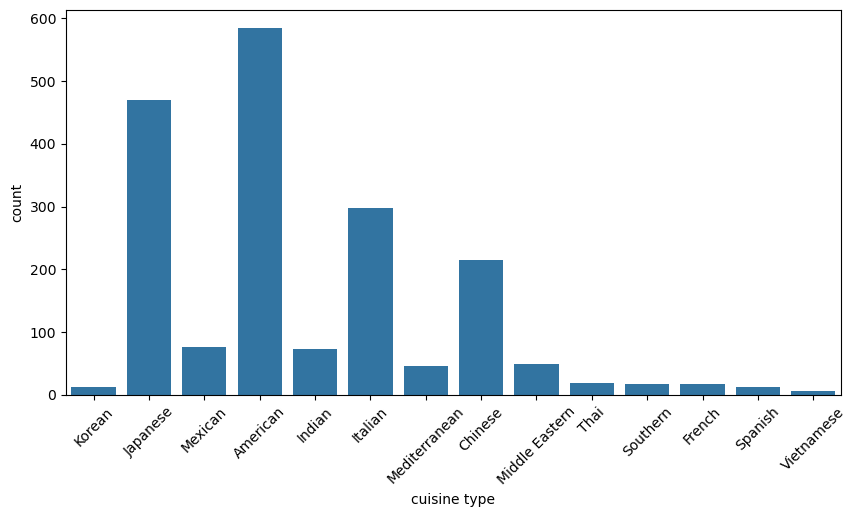

In [878]:
#Analysing order distribution by Cuisine type
plt.figure(figsize = (10,5))
sns.countplot(data=df, x='cuisine_type')
plt.xlabel('cuisine type')
plt.xticks(rotation=45)
plt.show()

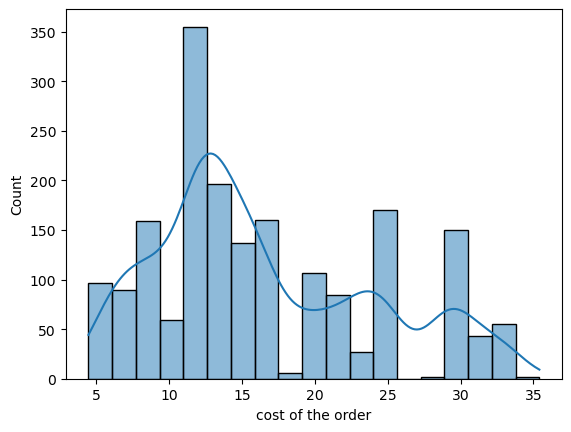

In [880]:
#Analysing cost of the order distribution
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.xlabel('cost of the order')
plt.show()

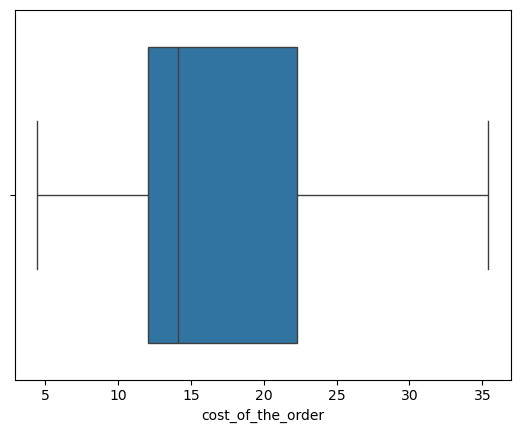

In [882]:
#Using boxplot to visualize the quartiles for cost of the order data
sns.boxplot(data=df, x='cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.show()

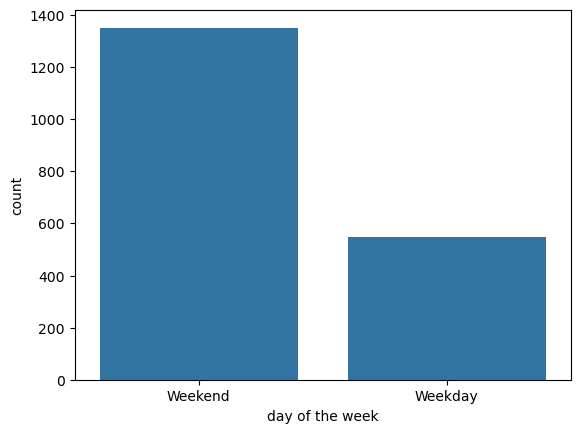

In [884]:
#orders by day of the week
sns.countplot(data=df, x='day_of_the_week')
plt.xlabel('day of the week')
plt.show()

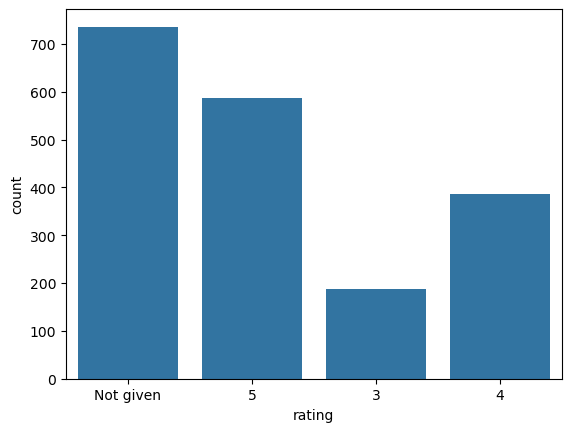

In [886]:
#Analysing rating distribution
sns.countplot(data=df, x='rating')
plt.xlabel('rating')
plt.show()

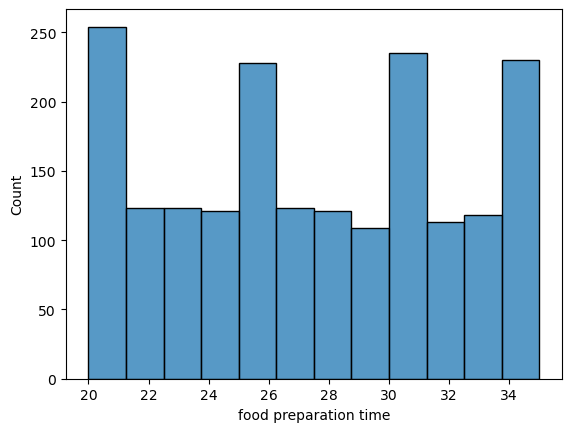

In [888]:
#Analysing distribution of food preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.xlabel('food preparation time')
plt.show()

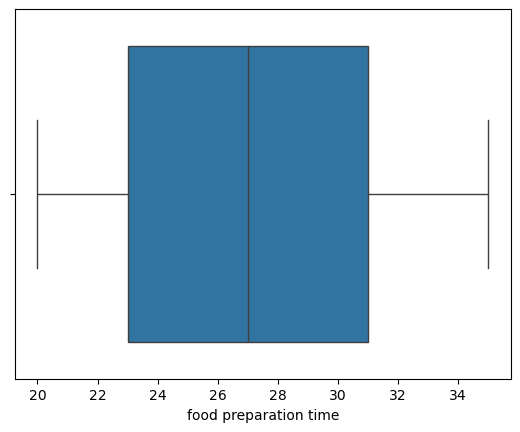

In [890]:
#Using boxplot to visualize the quartiles for food preparation time data
sns.boxplot(data=df, x='food_preparation_time')
plt.xlabel('food preparation time')
plt.show()

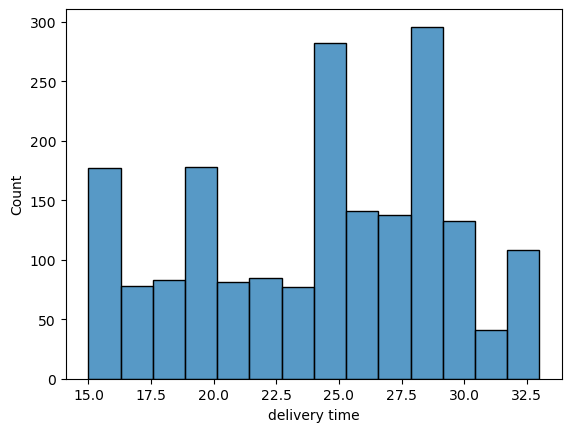

In [892]:
#Analyzing the ditribution of delivery time
sns.histplot(data=df, x='delivery_time')
plt.xlabel('delivery time')
plt.show()

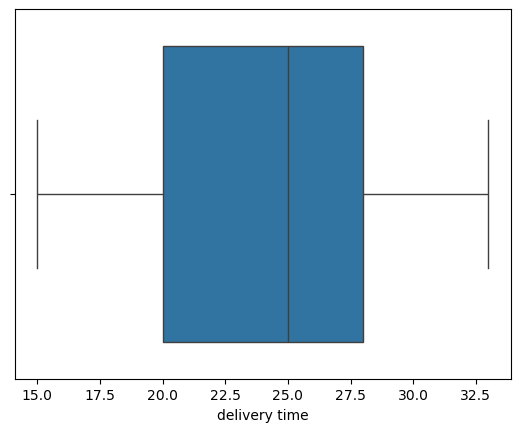

In [894]:
#Using boxplot to visualize the quartiles for delivery time data
sns.boxplot(data=df, x='delivery_time')
plt.xlabel('delivery time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [897]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The following are the top 5 restaurants:
1. **Shake Shack** ( with 219 orders)
2. **The Meatball Shop** ( with 132 orders)
3. **Blue Ribbon Sushi** ( with 119 orders)
4. **Blu Ribbon Fried Chicken** ( with 96 orders)
5. **Parm** ( with 68 orders)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [901]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() 


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:

The most popular cuisine on weekends is the American cuisine. In the current dataset American cuisine tops the list with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [905]:
#Orders that cost above 20$
df_orders_greater_20 = df[df['cost_of_the_order']>20]

#Number of orders grater than 20$
df_orders_greater_20.shape[0]

# Calculate percentage of such orders in the dataset
order_percent = (df_orders_greater_20.shape[0] / df.shape[0]) * 100

round(order_percent, 2)

29.24

#### Observations:

Percentage of orders above 20$ is 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [909]:
#Mean order delivery time
mean_order_delivery_time = df['delivery_time'].mean() 

round(mean_order_delivery_time, 2)

24.16

#### Observations:

The mean order delivery time for this dataset is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [913]:
# Count of orders per customer id
df_freq_customers = df['customer_id'].value_counts()
df_freq_customers_top3 = df_freq_customers.head(3)
df_freq_customers_top3

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

Top 3 most frequest customers:

1. Customer ID:**52832** with 13 orders
2. Customer ID:**47440** with 10 orders
3. Customer ID:**83287** with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


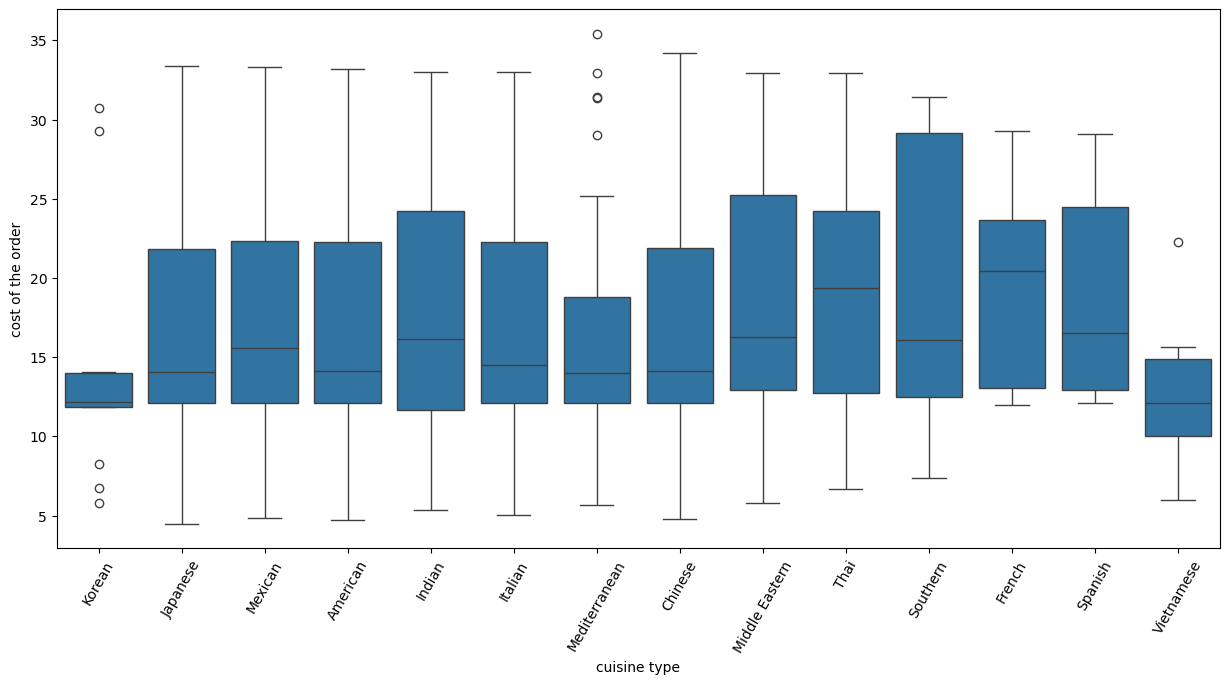

In [918]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xlabel('cuisine type')
plt.ylabel('cost of the order')
plt.xticks(rotation = 60)
plt.show()

In [920]:
#Calculating the average cost of each cuisine
df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending = False)

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

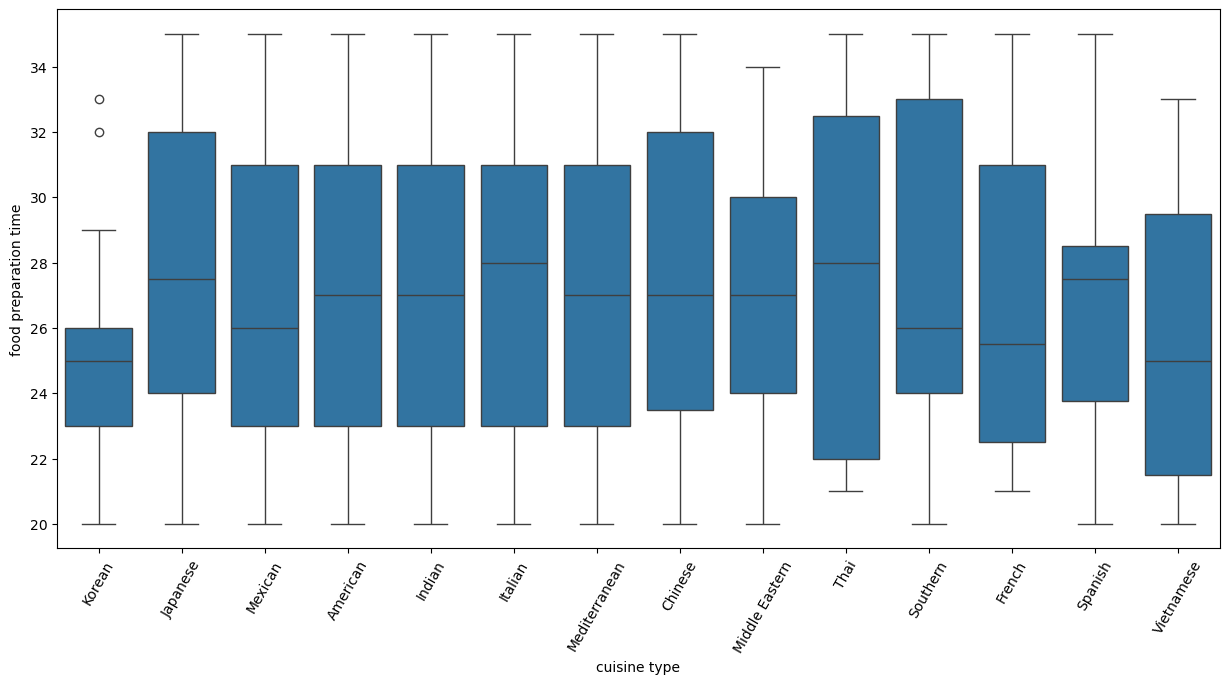

In [922]:
# Relationship between cuisine_type and food_preparation_time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xlabel('cuisine type')
plt.ylabel('food preparation time')
plt.xticks(rotation = 60)
plt.show()

In [924]:
#Checking the outliers for Korean cuisine
df[df['cuisine_type'] == 'Korean'].sort_values(by='food_preparation_time',ascending = False)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
747,1476894,384698,Don's Bogam BBQ & Wine Bar,Korean,14.07,Weekend,3,33,16
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
1129,1477985,325272,Cho Dang Gol,Korean,12.13,Weekend,4,29,16
301,1476856,59674,Woorijip,Korean,8.25,Weekend,3,26,26
1449,1477461,241719,Kori Restaurant and Bar,Korean,12.18,Weekday,4,26,26
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
852,1477746,288777,Don's Bogam BBQ & Wine Bar,Korean,12.61,Weekend,4,25,26
1255,1478164,138024,Cho Dang Gol,Korean,11.84,Weekend,5,25,16
1471,1476926,349854,Cho Dang Gol,Korean,14.02,Weekend,Not given,25,20
653,1478363,138024,Cho Dang Gol,Korean,29.25,Weekend,4,23,21


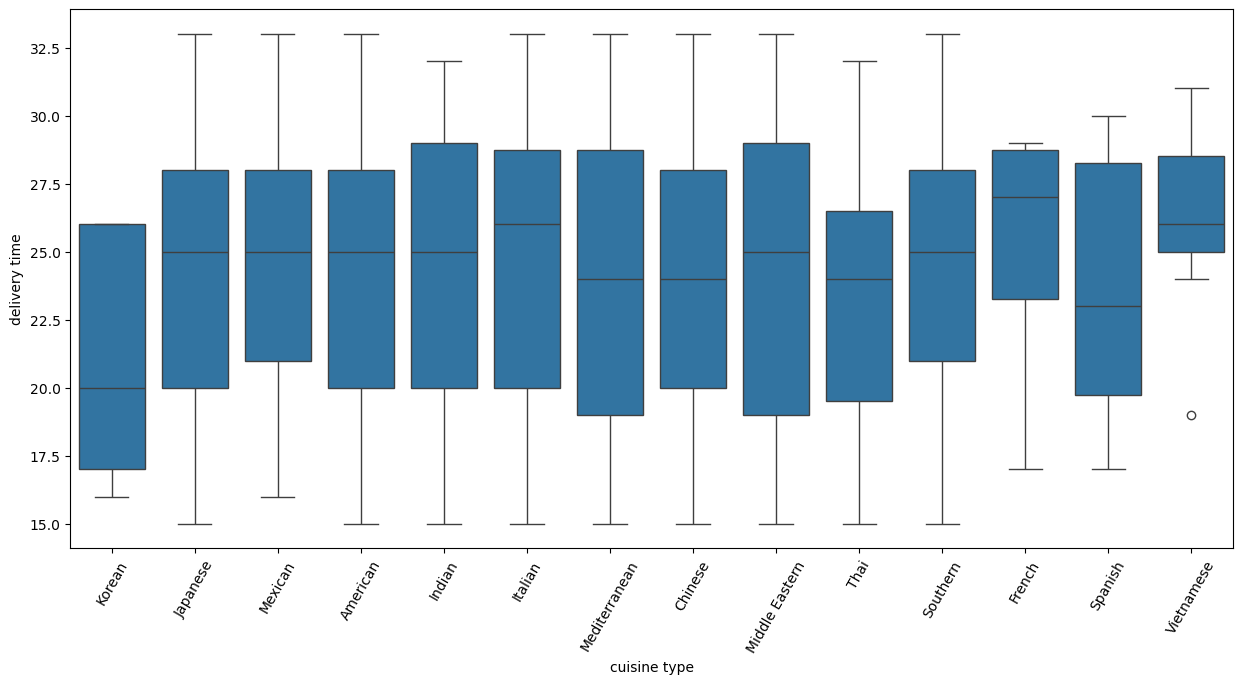

In [926]:
# Relationship between cuisine type and delivery_time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df)
plt.xlabel('cuisine type')
plt.ylabel('delivery time')
plt.xticks(rotation = 60)
plt.show()

In [928]:
#Checking the outlier for Vietnamese cuisine
df[df['cuisine_type'] == 'Vietnamese'].sort_values(by='delivery_time',ascending = True)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1554,1476957,54630,V-Nam Cafe,Vietnamese,12.08,Weekend,Not given,31,19
1190,1476837,147468,Nha Trang One,Vietnamese,15.67,Weekday,3,23,24
746,1477189,54630,V-Nam Cafe,Vietnamese,22.26,Weekend,5,33,26
1272,1477555,361497,V-Nam Cafe,Vietnamese,12.13,Weekend,4,20,26
640,1477799,399520,Xe May Sandwich Shop,Vietnamese,14.07,Weekday,Not given,28,28
373,1477014,399520,Xe May Sandwich Shop,Vietnamese,7.96,Weekend,5,25,29
1164,1478373,40808,V-Nam Cafe,Vietnamese,6.01,Weekday,3,20,31


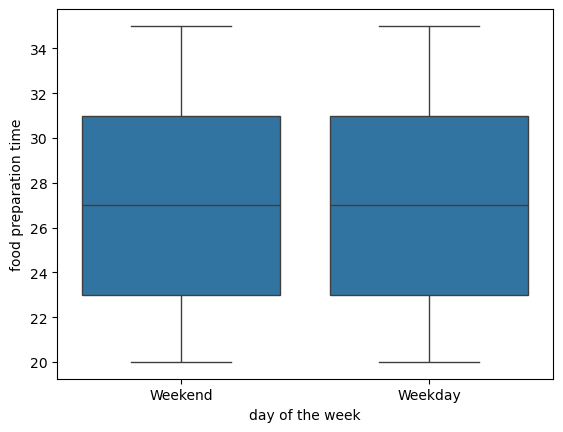

In [930]:
# Relationship between day_of_the_week and food_preparation_time
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df)
plt.xlabel('day of the week')
plt.ylabel('food preparation time')
plt.show()

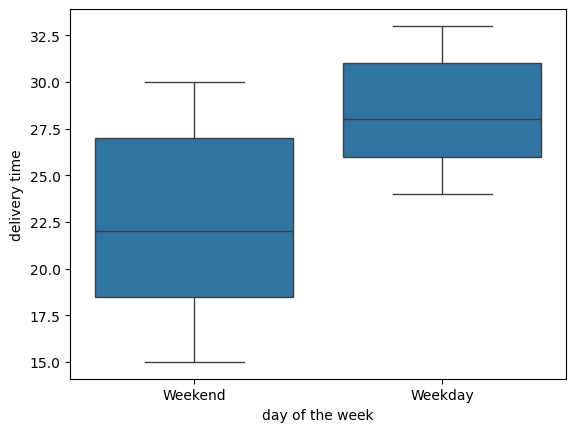

In [932]:
# Relationship between day_of_the_week and delivery_time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xlabel('day of the week')
plt.ylabel('delivery time')
plt.show()

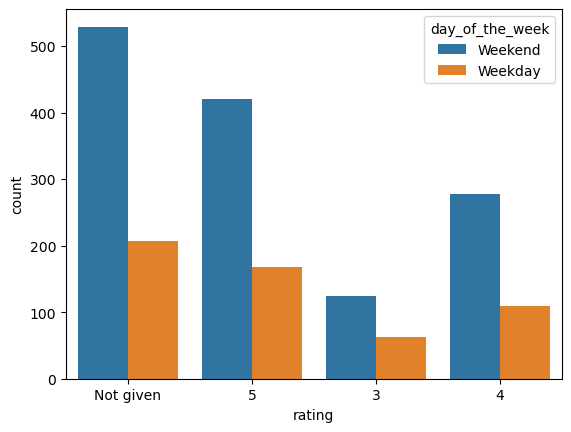

In [934]:
# Relationship between rating and day_of_the_week
sns.countplot(data = df, x = "rating", hue = "day_of_the_week", )
plt.show()

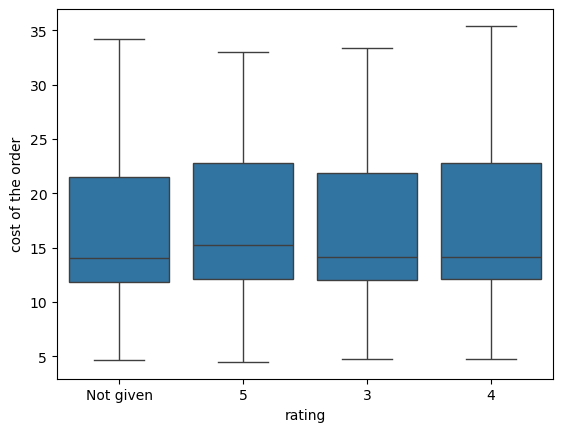

In [936]:
# Relationship between cost_of_the_order and rating
sns.boxplot(data = df, x = 'rating', y = "cost_of_the_order")
plt.xlabel('rating')
plt.ylabel('cost of the order')
plt.show()

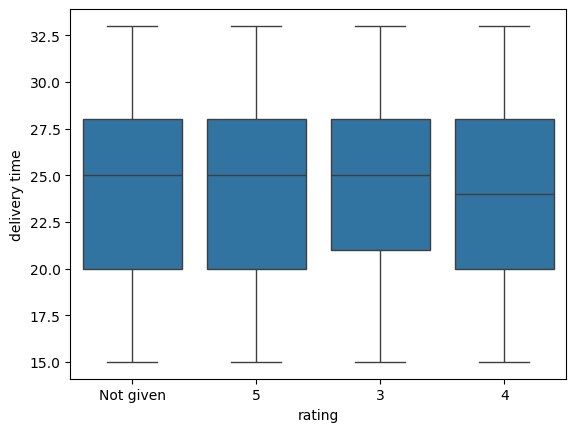

In [938]:
# Relationship between delivery_time and rating
sns.boxplot(data = df, x = 'rating', y = "delivery_time")
plt.xlabel('rating')
plt.ylabel('delivery time')
plt.show()

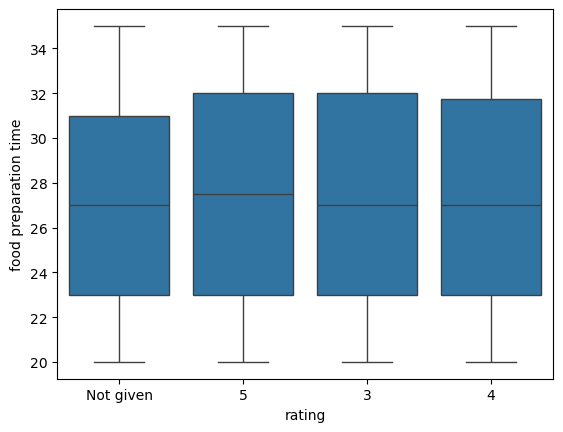

In [940]:
# Relationship between food_preparation_time and rating
sns.boxplot(data = df, x = 'rating', y = "food_preparation_time")
plt.xlabel('rating')
plt.ylabel('food preparation time')
plt.show()

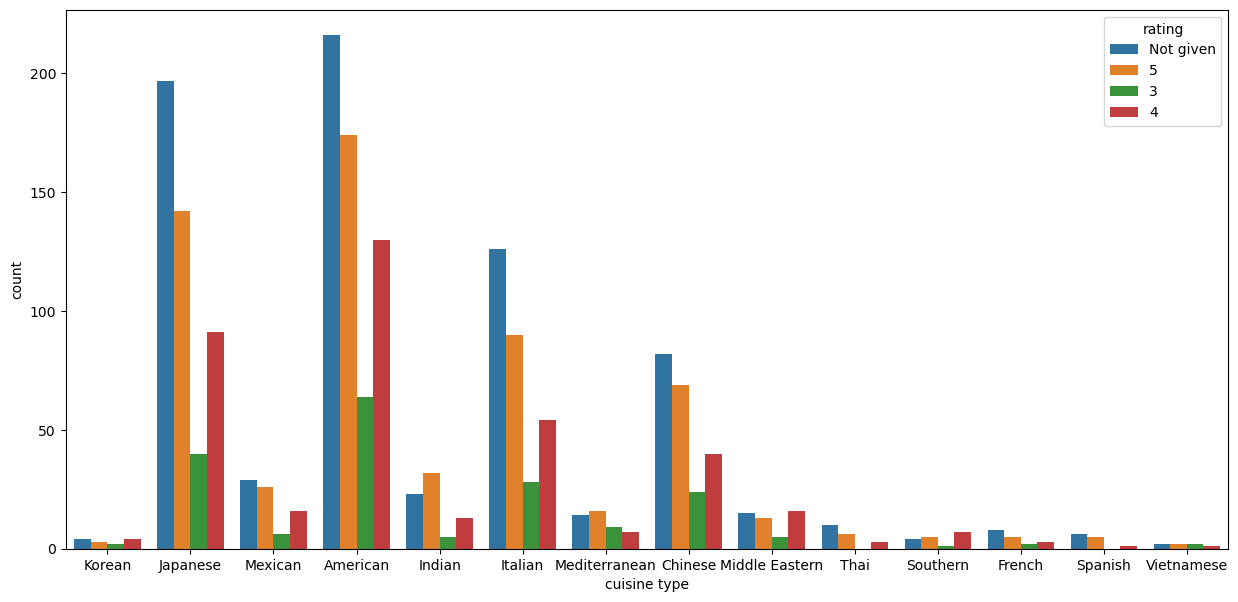

In [942]:
#Checking ratings per cuisine
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating')
plt.xlabel('cuisine type')
plt.show()

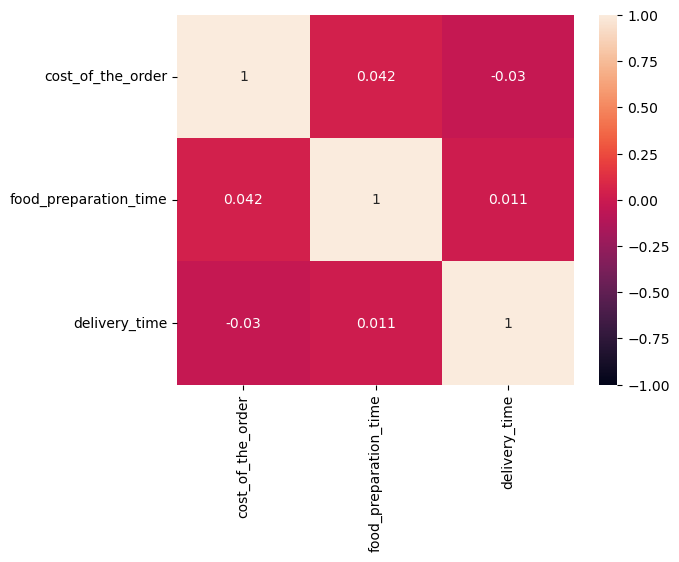

In [944]:
#Heat map for numeric columns
columns = ['cost_of_the_order','food_preparation_time','delivery_time']
sns.heatmap(df[columns].corr(), annot=True, vmin=-1, vmax=1 )
plt.show()

Correlation is close to 0 for all variables. Not much of a correlation. The relation that seem to have the most correlation is food_preparation_time and cost_of_the_order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [948]:
#Records with ratings provided. Making a copy since we have to modify datatype down the line. Also without copy, there was a SettingWithCopyWarning
df_rating_given = df[df['rating'] != 'Not given'].copy()

#To determine mean(), the rating column needs to be numeric. It is currently string.
#Therefore converting rating column from object to integer. 
df_rating_given['rating'] = df_rating_given['rating'].astype('int')

#Using reset_index() so that the return value is a dataframe and we can access the columns easier
df_rg_counts = df_rating_given.groupby(['restaurant_name'])['rating'].count().reset_index()
df_rg_counts.head()

df_rg_count_greater_50 = df_rg_counts[df_rg_counts['rating'] > 50]
df_rg_count_greater_50=df_rg_count_greater_50.rename(columns = {'rating':'rating_count'})

#Calculate mean for each restaurant
df_rg_means = df_rating_given.groupby(['restaurant_name'])['rating'].mean().reset_index()

#Restaurants with rating greater than 4
df_rg_mean_greater_4 = df_rg_means[df_rg_means['rating']>4]
df_rg_mean_greater_4=df_rg_mean_greater_4.rename(columns = {'rating':'rating_mean'})

#Merging the two dataframes to see the intersection
df_rg_mean_greater_4.merge(df_rg_count_greater_50, how='inner', on = 'restaurant_name').sort_values(by ='rating_mean', ascending = False)


,restaurant_name,rating_mean,rating_count
3,The Meatball Shop,4.511905,84
0,Blue Ribbon Fried Chicken,4.328125,64
2,Shake Shack,4.278195,133
1,Blue Ribbon Sushi,4.219178,73


#### Observations:

Following are the restaurants that qualify to get the promotional offer:

1. **The Meatball Shop** with the average rating of 4.51 and 84 ratings
2. **Blue Ribbon Fried Chicken** with an average rating of 4.33 and 64 ratings
3. **Shake Shack** with an average rating of 4.28 and 133 ratings
4. **Blue Ribbon Sushi** with an average of 4.22 and 73 ratings
   

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [952]:
#define function to calculate reveue
def calc_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return 0

#Applying calc_revenue() to all rows in df and creating a new column comp_revenue
df['comp_revenue'] = df['cost_of_the_order'].apply(calc_revenue)
round(df['comp_revenue'].sum(),2)
    

6166.3

#### Observations:

The company made $6166.3 in revenue across all orders in the dataset.

In [955]:
#Determining the top 5 restaurants that generated the most revenue for FoodHub
df.groupby(['restaurant_name'])['comp_revenue'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  703.6070
The Meatball Shop            419.8285
Blue Ribbon Sushi            360.4605
Blue Ribbon Fried Chicken    340.2035
Parm                         218.5570
Name: comp_revenue, dtype: float64

Top 5 restaurants that generated the most revenue for FoodHub are:

- **Shake Shack**  (\$703.61)
- **The Meatball Shop** (\$419.83)
- **Blue Ribbon Sushi** (\$360.46)
- **Blue Ribbon Fried Chicken** (\$340.20)
- **Parm** (\$218.56)

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [959]:
#Total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Percentage of orders with total time greater than 60 min = Number of orders with > 60 min total time/total number of orders
round(df[df['total_time'] > 60].shape[0]/df.shape[0]*100,2)

10.54

#### Observations:

About 10.54% of orders took more than 60 min, from the time the order was placed, to have the food delivered to the customer.

In [962]:
#Checking what ratings these orders received
df[df['total_time']>60]['rating'].value_counts()

rating
Not given    81
5            61
4            39
3            19
Name: count, dtype: int64

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [965]:
weekday_max = df[df['day_of_the_week']=='Weekday']['delivery_time'].max()
print('Max delivery time for weekdays = ', weekday_max, 'min.')
weekday_mean = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print('Mean delivery time for weekdays = ', round(weekday_mean,2), 'min.')
weekday_min = df[df['day_of_the_week']=='Weekday']['delivery_time'].min()
print('Min delivery time for weekdays = ', weekday_min, 'min.')

weekend_max = df[df['day_of_the_week']=='Weekend']['delivery_time'].max()
print('Max delivery time for weekends = ', weekend_max, 'min.')
weekend_mean = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print('Mean delivery time for weekends = ', round(weekend_mean,2), 'min.')
weekend_min = df[df['day_of_the_week']=='Weekend']['delivery_time'].min()
print('Min delivery time for weekends = ', weekend_min, 'min.')

Max delivery time for weekdays =  33 min.
Mean delivery time for weekdays =  28.34 min.
Min delivery time for weekdays =  24 min.
Max delivery time for weekends =  30 min.
Mean delivery time for weekends =  22.47 min.
Min delivery time for weekends =  15 min.


#### Observations:

The delivery time for weekdays is generally higher than that on weekends. The average delivery time on weekdays is almost 6 min more than that on weekends.
- *Max delivery time for weekdays =  33 min.*
- *Mean delivery time for weekdays =  28.34 min.*
- *Min delivery time for weekdays =  24 min.*
- *Max delivery time for weekends =  30 min.*
- *Mean delivery time for weekends =  22.47 min.*
- *Min delivery time for weekends =  15 min.*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The datafile consists of 1898 rows and 9 columns in the dataset and there are 1200 unique customers. There are 178 unique restaurants serving 14 different cuisines. About 39% of the orders are not rated. Those that are rated have a 3 or above rating. American cuisine is the most popular cuisine in this dataset followed by Japanese. The following are the top 5 restaurants:
- Shake Shack ( with 219 orders)
- The Meatball Shop ( with 132 orders)
- Blue Ribbon Sushi ( with 119 orders)
- Blu Ribbon Fried Chicken ( with 96 orders)
- Parm ( with 68 orders)

The cuisine-type vs cost-of-the-order graph showed that the Korean, Mediterranean and Vietnames cuisine have received some unusually expensive orders. It could be that they received some large orders or there are some expensive restaurants on the app. The Korean cuisine has also received unusually inexpensive orders. With respect to food preparation time, Don's Bogam BBQ & Wine Bar have been an outlier twice. Once they took 33 and another time, 32 minutes. Delivery time was 16min and 20 min respectively. They were both on weekends, perhaps the restaurant is busy on weekends and therefore food prep takes longer. The rating for the first one was a 3 and the other was not rated.  
The analysis also shows that the number of orders on weekdays are considerably higher than weekends. The delivery time is higher on weekdays as well. The average delivery time on weekdays is almost 6 min more than that on weekends. This could be due to traffic or not enough employees to handle larger order numbers. 
About 10.54% of orders (200 orders) took more than 60 min, from the time the order was placed, to have the food delivered to the customer. Of these 50% of the orders were rated a 3 or not rated.
Considering all orders in the dataset - for orders that are rated, those placed on the weekend tend to be rated higher than those on the weekdays.
Shake Shack is the most popular restaurant. It gets a lot of ratings and they are high ratings too. It is also the top revenue generating restaurant for FoodHub. Top 5 restaurants that generated the most revenue for FoodHub are:
- Shake Shack (\$703.61)
- The Meatball Shop (\$419.83)
- Blue Ribbon Sushi (\$360.46)
- Blue Ribbon Fried Chicken (\$340.20)
- Parm (\$218.56)


### Recommendations:

*  Since delivery time seems to be higher on weekdays, investigating the cause will be beneficial. If it is due to low number of delivery personnel a plan to increase it would be needed. If it is the traffic during peak hours that is causing this, may be optimizing delivery route and logistics would be an option. The company can also introduce zone-based delivery where drivers are assigned to zones so that they do not have to travel long distances to pick up and drop off. 
*  To increase usage of the app, the company can introduce loyalty programs with rewards, offer discounts during certain events or offer a discount period.
*  The company can also add personalized recommendations based on order history for each customer. Recommending products at check out would be an easy way to get customers to add more items to their order.
*  The company can also partner with restaurants to optimize their food preparation time for delivery orders (for example - Don's Bogam BBQ & Wine Bar that took unusually long to prepare food.)
* The company is already thinking of rewarding restaurants that are top performers with a promotional offer for advertising.

---